# scipy.integrat.solve_ivp
> # $ \frac{dx}{dt} = cos(y) \\
\frac{dy}{dt} = sin(x)\\
\text{where, }\begin{cases}y(0) & = 1\\
y'(0) & = 1 
\end{cases}$

(-1.2972498421129277,
 1.2970996248686584,
 0.2748287351423644,
 2.8662064155283975)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
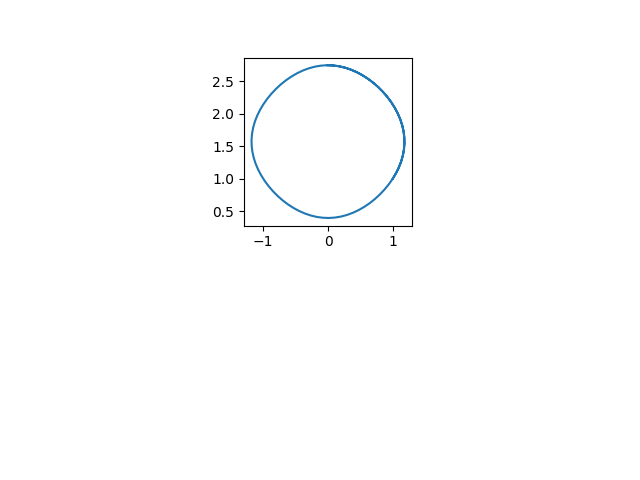

In [86]:
import scipy as sci
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

def y(t,picard):
    x,y= picard
    fx = np.cos(y)
    fy = np.sin(x)
    return fx,fy
#sol = sci.integrate.solve_ivp(y,(0,10),(1,1))

sol = sci.integrate.solve_ivp(y,(0,10),(1,1), t_eval = np.linspace(0,10,100))
x,y = sol.y

fig = plt.figure()
ax = fig.add_subplot(2,1,1)
ax.plot(x,y)
ax.axis('scaled')

In [2]:
t = sol.t
ax = fig.add_subplot(212)
ax.plot(t,x)
ax.plot(t,y)

In [3]:
def odefun(t,state):
    x,y,z = state
    return 10*(y-x), x*(28-z)-y, x*y-8/3*z
def sol():
    tspan = [0,30]
    state0 = [-0.1, 0.5, 1]
    state = sci.integrate.solve_ivp(odefun,tspan,state0)
    return state.t, state.y[0,:], state.y[1,:], state.y[2,:]
def plotfunc(t,x,y,z):
    fig = plt.figure()
    ax = fig.add_subplot(221)
    ax.plot(t,x)
    ax = fig.add_subplot(222)
    ax.plot(t,y)
    ax = fig.add_subplot(223)
    ax.plot(t,z)
    ax = fig.add_subplot(224)
    ax.plot(x,z)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
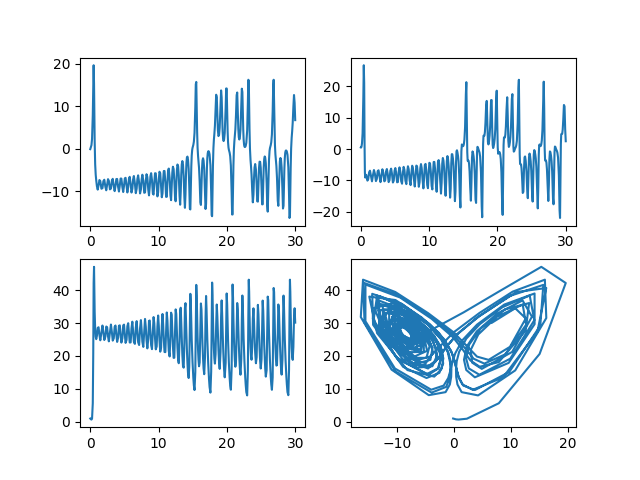

In [4]:
t,x,y,z = sol()
plotfunc(t,x,y,z)

# [a mass on a spring](https://ericlab.tistory.com/71)

> $ x \Rightarrow \text{ function of length(distance) of spring}$  
> $ x(t) \Rightarrow \text{ fucntion of time variavle length of spring}$
>> $Fk = -kx $  
>> $Fg = ma $  
>>> $ ma = -kx $  
>>> $ \because ma = m \ddot{x} $  
>>> $ \therefore m \ddot{x} = -kx$  
> ## $ \therefore m \ddot{x} + kx = 0 $
> ## $ m \frac{d^2}{dt^2}x + kx = 0 $


In [5]:
import sympy as sym

t,m,k = sym.symbols('t m k')
x = sym.symbols('x', cls=sym.Function)
f = sym.dsolve( m*x(t).diff(t,2) + k*x(t), x(t))
f

Eq(x(t), C1*exp(-t*sqrt(-k/m)) + C2*exp(t*sqrt(-k/m)))

# damping
> damping
>> 물체의 속도( $\vec{v}$ )에 비례해서 운동을 방해하는 힘.  
>> 일종의 피스톤 낙하산 날개..  
>> $ Fd  = -d\vec{v} = -c\dot{x}$
> ## $\therefore Fd = -c \dot{x} \begin{cases}
m \ddot{x} &= -kx + -c\dot{x} \\
m \ddot{x} + c\dot{x} + kx & = 0 \\
\ddot{x} + \frac{c \dot{x}}{m} + \frac{kx}{m} & = 0 \\
\frac{d^2x}{dt^2} + \frac{c}{m}\frac{dx}{dt} + \frac{k}{m}x & = 0 \\
x'' + \frac{c}{m}x' + \frac{k}{m}x & = 0 \\
x(t)'' + \frac{c}{m}x(t)' + \frac{k}{m}x(t) & = 0 \\
\end{cases}$

In [6]:
c = sym.symbols('c')
sym.dsolve(x(t).diff(t,2) + c/m * x(t).diff(t,1) + k/m*x(t))

Eq(x(t), C1*exp(t*(-c - sqrt(c**2 - 4*k*m))/(2*m)) + C2*exp(t*(-c + sqrt(c**2 - 4*k*m))/(2*m)))

# ODEs
> ## $ \frac{dy}{dt} = f(t,y)
\begin{cases}
y & \text{ is a vector} \\
y(0) & = y_{0}
\end{cases} $  
# example
> ## $ \frac{dC}{dt} = \frac {-C}{\tau} \begin{cases} 
\tau & = 1 \\ 
C(0) & = 1 \\
t_{end} & = 5
\end{cases}
\quad \because C' + \frac{C}{\tau} = 0
$
> ## $ C(t) = C_1 e^{\frac{t}{\tau}} \begin{cases} 
C(0) = 1 \\
\tau = 1 \\
\end{cases}
\quad \because C(t) = e^t
$

In [85]:
t, tau = sym.symbols('t tau')
C = sym.symbols('C',cls=sym.Function)(t)
y = sym.dsolve(C.diff(t) + C/tau,C)
C1, _, _ = y.free_symbols
f = y.subs(C1,1).subs(tau,1)
yn = [sym.N(f.subs(t,i)) for i in np.arange(0,6)]
f

Eq(C(t), exp(-t))

[0 5]
C(t)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
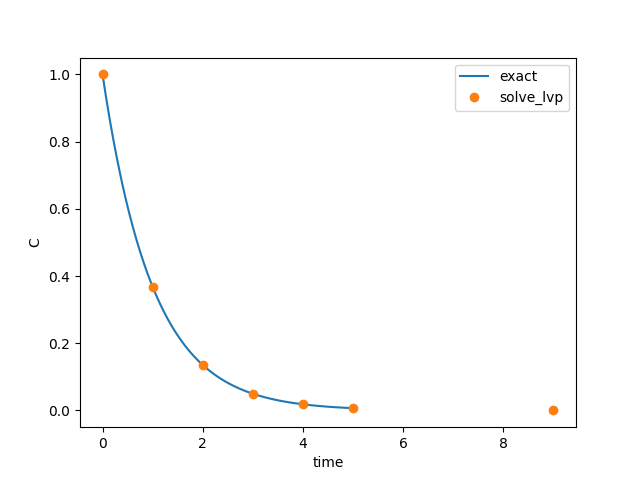

In [103]:
def fA(t,C):
    tau = 1.0
    return -C/tau
t_span = np.array([0,5])
print(t_span)
C0 = np.array([1.0])
soln = sci.integrate.solve_ivp(fA, [0,9], C0, t_eval=[0,1,2,3,4,5,9])
t_exact = np.linspace(t_span[0],t_span[1],101)
C_exact = C0 * np.exp(-t_exact/1.0)
C_exact = C0 * np.exp(-t_exact/1.0)
print(C)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(t_exact, C_exact, '-', label='exact')
ax.plot(soln.t,soln.y[0],'o',label='solve_lvp')
#ax.plot(soln.t,soln.y[1],'x',label='y[1]')
ax.set_xlabel('time')
ax.set_ylabel('C')
ax.legend()
